In [13]:
import numpy as np
import pandas as pd
from typing import Dict, Tuple
from scipy import stats
from IPython.display import Image
from sklearn.externals.six import StringIO 
from IPython.display import Image
import graphviz 
import pydotplus
from sklearn.datasets import load_iris, load_boston
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor, KNeighborsClassifier
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.metrics import accuracy_score, balanced_accuracy_score
from sklearn.metrics import precision_score, recall_score, f1_score, classification_report
from sklearn.metrics import confusion_matrix
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor, export_graphviz
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.ensemble import ExtraTreesClassifier, ExtraTreesRegressor
from sklearn.ensemble import GradientBoostingClassifier, GradientBoostingRegressor
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import mean_absolute_error, mean_squared_error, mean_squared_log_error, median_absolute_error, r2_score 
from sklearn.metrics import roc_curve, roc_auc_score
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline 
sns.set(style="ticks")
from sklearn.svm import SVC, NuSVC, LinearSVC, OneClassSVM, SVR, NuSVR, LinearSVR
%matplotlib inline
sns.set(rc={'figure.figsize':(16,8)})

/usr/local/lib/python3.6/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)


In [4]:
df = pd.read_csv('titanic.csv', error_bad_lines=False, comment='#')
#df.drop(columns='id', inplace = True);
df.drop(columns='Cabin', inplace= True)
for col in df.columns:
    count = df[df[col].isnull()].shape[0]
    print('{}  -  {}'.format(col, count))
print ('{} - размер датасета'.format(df.shape))

PassengerId  -  0
Survived  -  0
Pclass  -  0
Name  -  0
Sex  -  0
Age  -  177
SibSp  -  0
Parch  -  0
Ticket  -  0
Fare  -  0
Embarked  -  2
(891, 11) - размер датасета


In [6]:
df = df.dropna(axis=0, how='any')
(df.shape)

(712, 11)

In [7]:
df.drop(columns=['Ticket', 'Name'], inplace= True)
df.reset_index(drop= True, inplace=True)
df

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,male,22.0,1,0,7.2500,S
1,2,1,1,female,38.0,1,0,71.2833,C
2,3,1,3,female,26.0,0,0,7.9250,S
3,4,1,1,female,35.0,1,0,53.1000,S
4,5,0,3,male,35.0,0,0,8.0500,S
...,...,...,...,...,...,...,...,...,...
707,886,0,3,female,39.0,0,5,29.1250,Q
708,887,0,2,male,27.0,0,0,13.0000,S
709,888,1,1,female,19.0,0,0,30.0000,S
710,890,1,1,male,26.0,0,0,30.0000,C


In [8]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder 
le = LabelEncoder()
ohe = OneHotEncoder()
sex = le.fit_transform(df['Sex'])
sex = pd.DataFrame({'Sex':sex.T})
Embarked = le.fit_transform(df['Embarked'])
Embarked = pd.DataFrame({'Embarked' : Embarked.T })
sex


,Sex
0,1
1,0
2,0
3,0
4,1
...,...
707,0
708,1
709,0
710,1


In [9]:
del df['Sex']
del df['Embarked']
df = df.join(sex)
df = df.join(Embarked)
df

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,Sex,Embarked
0,1,0,3,22.0,1,0,7.2500,1,2
1,2,1,1,38.0,1,0,71.2833,0,0
2,3,1,3,26.0,0,0,7.9250,0,2
3,4,1,1,35.0,1,0,53.1000,0,2
4,5,0,3,35.0,0,0,8.0500,1,2
...,...,...,...,...,...,...,...,...,...
707,886,0,3,39.0,0,5,29.1250,0,1
708,887,0,2,27.0,0,0,13.0000,1,2
709,888,1,1,19.0,0,0,30.0000,0,2
710,890,1,1,26.0,0,0,30.0000,1,0


In [0]:
X = df.drop(columns='Survived')
y = df.Survived

In [0]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

In [38]:
bc1 = BaggingClassifier(n_estimators=5, oob_score=True, random_state=10)
bc1.fit(X_train, y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/_bagging.py:633: UserWarning: Some inputs do not have OOB scores. This probably means too few estimators were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/_bagging.py:638: RuntimeWarning: invalid value encountered in true_divide
  predictions.sum(axis=1)[:, np.newaxis])


BaggingClassifier(base_estimator=None, bootstrap=True, bootstrap_features=False,
                  max_features=1.0, max_samples=1.0, n_estimators=5,
                  n_jobs=None, oob_score=True, random_state=10, verbose=0,
                  warm_start=False)

In [0]:
bc1.estimators_samples_

In [22]:
# Сконвертируем эти данные в двоичную матрицу, 
# 1 соответствует элементам, попавшим в обучающую выборку
bin_array = np.zeros((5, X.shape[0]))
for i in range(5):
    for j in bc1.estimators_samples_[i]:
        bin_array[i][j] = 1
bin_array

array([[1., 0., 0., ..., 1., 0., 1.],
       [0., 1., 1., ..., 1., 1., 0.],
       [1., 1., 0., ..., 0., 1., 1.],
       [1., 0., 1., ..., 1., 0., 1.],
       [0., 1., 1., ..., 0., 0., 1.]])

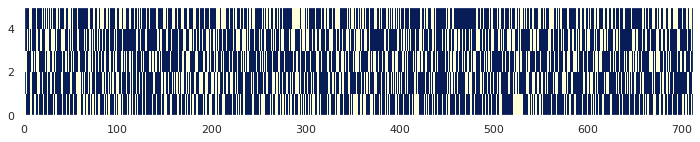

In [23]:
# И визуализируем (синим цветом показаны данные, которые попали в обучающую выборку)
fig, ax = plt.subplots(figsize=(12,2))
ax.pcolor(bin_array, cmap='YlGnBu')
plt.show()

In [24]:
# Оценим Out-of-bag error, теоретическое значение 37%
for i in range(5):
    cur_data = bin_array[i]
    len_cur_data = len(cur_data)
    sum_cur_data = sum(cur_data)
    (len(bin_array[0]) - sum(bin_array[0])) / len(bin_array[0])
    oob_i = (len_cur_data - sum_cur_data) / len_cur_data
    print('Для модели № {} размер OOB составляет {}%'.format(i+1, round(oob_i, 4)*100.0))

Для модели № 1 размер OOB составляет 35.67%
Для модели № 2 размер OOB составляет 36.52%
Для модели № 3 размер OOB составляет 37.22%
Для модели № 4 размер OOB составляет 37.36%
Для модели № 5 размер OOB составляет 38.9%


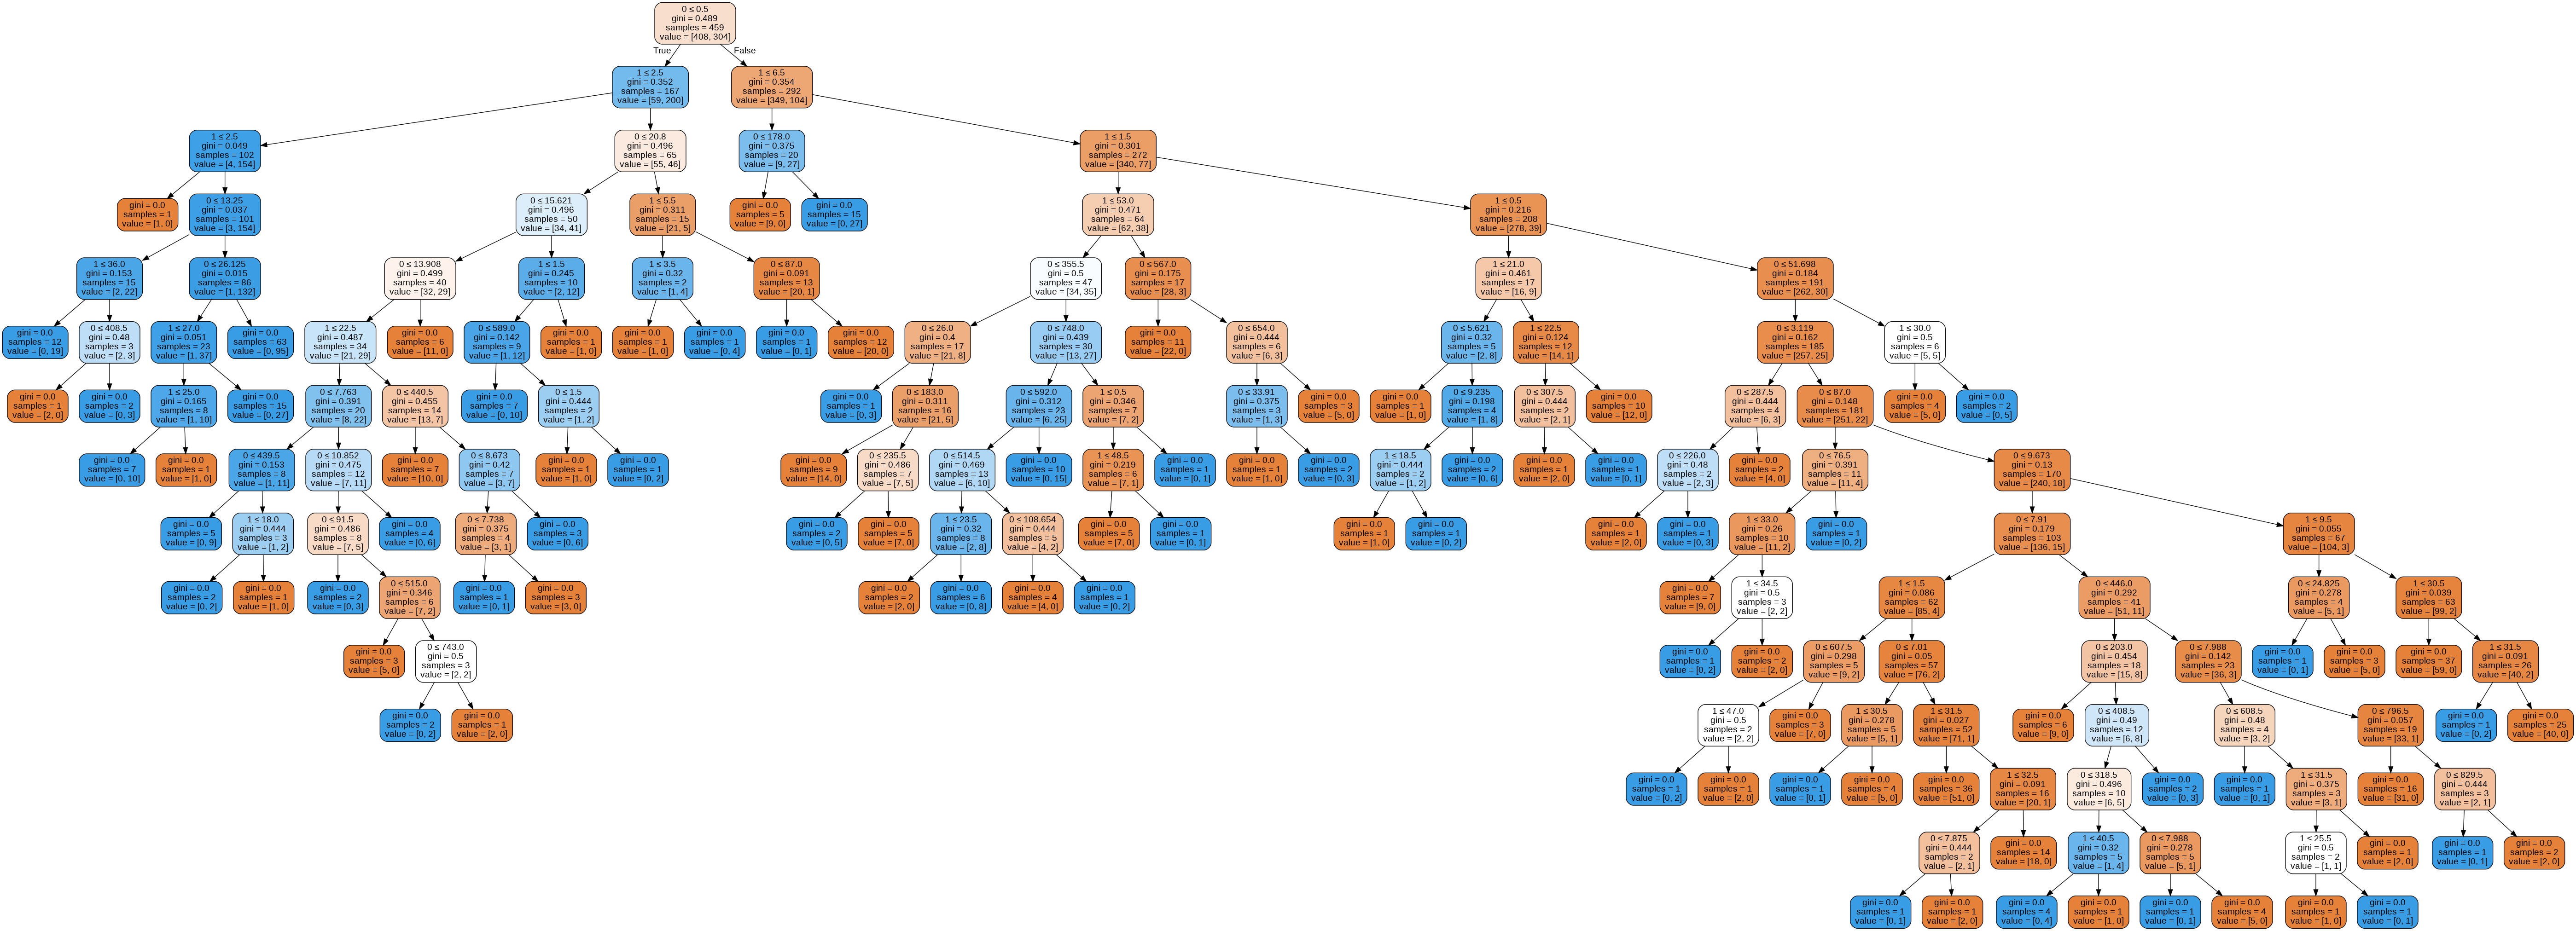

In [30]:
# Визуализация обученных решающих деревьев
Image(get_png_tree(bc1.estimators_[0], y[:8]), width="500")

# Случайный лес


In [68]:
from sklearn.ensemble import AdaBoostClassifier, BaggingClassifier, RandomForestClassifier
clf_rf = RandomForestClassifier(n_estimators=5, max_depth=15)
clf_rf.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=15, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=5,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [69]:
from sklearn.metrics import f1_score as f1_sc, accuracy_score as accuracy
print('accuracy_score для обучающего набора:', accuracy(y_train, clf_rf.predict(X_train)))
print('accuracy_score для тестового набора :', accuracy(y_test, clf_rf.predict(X_test)), '\n')
print('f1_score для обучающего набора:', f1_sc(y_train, clf_rf.predict(X_train)))
print('f1_score для тестового набора :', f1_sc(y_test, clf_rf.predict(X_test)), '\n')

accuracy_score для обучающего набора: 0.961335676625659
accuracy_score для тестового набора : 0.7902097902097902 

f1_score для обучающего набора: 0.9521739130434783
f1_score для тестового набора : 0.7222222222222221 



# BaggingClassifier

In [75]:
clf_bc = BaggingClassifier(n_estimators=1)
clf_bc.fit(X_train, y_train)

BaggingClassifier(base_estimator=None, bootstrap=True, bootstrap_features=False,
                  max_features=1.0, max_samples=1.0, n_estimators=1,
                  n_jobs=None, oob_score=False, random_state=None, verbose=0,
                  warm_start=False)

In [76]:
print('accuracy_score для обучающего набора:', accuracy(y_train, clf_bc.predict(X_train)))
print('accuracy_score для тестового набора :', accuracy(y_test, clf_bc.predict(X_test)), '\n')
print('f1_score для обучающего набора:', f1_sc(y_train, clf_bc.predict(X_train)))
print('f1_score для тестового набора :', f1_sc(y_test, clf_bc.predict(X_test)), '\n')

accuracy_score для обучающего набора: 0.8892794376098418
accuracy_score для тестового набора : 0.7832167832167832 

f1_score для обучающего набора: 0.8656716417910448
f1_score для тестового набора : 0.7394957983193278 



# Подбор гиперпараметров с помощью GridSearchCV

In [0]:
from sklearn.model_selection import GridSearchCV
params = {'n_estimators' : np.arange(1, 50, 1),
          'max_depth' : np.arange(3, 10, 1)}
grcrch = GridSearchCV(estimator=RandomForestClassifier(), param_grid=params)

In [65]:
grcrch.fit(X_train, y_train)

GridSearchCV(cv=None, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=No...
                                              random_state=None, verbose=0,
                                   

In [66]:
grcrch.best_params_

{'max_depth': 6, 'n_estimators': 33}

In [67]:
print('accuracy_score для обучающего набора:', accuracy(y_train, grcrch.best_estimator_.predict(X_train)))
print('accuracy_score для тестового набора :', accuracy(y_test, grcrch.best_estimator_.predict(X_test)), '\n')
print('f1_score для обучающего набора:', f1_sc(y_train, grcrch.best_estimator_.predict(X_train)))
print('f1_score для тестового набора :', f1_sc(y_test, grcrch.best_estimator_.predict(X_test)))

accuracy_score для обучающего набора: 0.8822495606326889
accuracy_score для тестового набора : 0.8391608391608392 

f1_score для обучающего набора: 0.8416075650118203
f1_score для тестового набора : 0.7628865979381443


In [57]:
params = {'n_estimators' : np.arange(1, 30, 1)}
grcrch = GridSearchCV(estimator=AdaBoostClassifier(), param_grid=params)
grcrch.fit(X_train, y_train)

GridSearchCV(cv=None, error_score=nan,
             estimator=AdaBoostClassifier(algorithm='SAMME.R',
                                          base_estimator=None,
                                          learning_rate=1.0, n_estimators=50,
                                          random_state=None),
             iid='deprecated', n_jobs=None,
             param_grid={'n_estimators': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29])},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [58]:
grcrch.best_estimator_

AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None, learning_rate=1.0,
                   n_estimators=12, random_state=None)

In [72]:
print('accuracy_score для обучающего набора:', accuracy(y_train, grcrch.best_estimator_.predict(X_train)))
print('accuracy_score для тестового набора :', accuracy(y_test, grcrch.best_estimator_.predict(X_test)), '\n')

print('f1_score для обучающего набора:', f1_sc(y_train, grcrch.best_estimator_.predict(X_train)))
print('f1_score для тестового набора :', f1_sc(y_test, grcrch.best_estimator_.predict(X_test)))

accuracy_score для обучающего набора: 0.8822495606326889
accuracy_score для тестового набора : 0.8391608391608392 

f1_score для обучающего набора: 0.8416075650118203
f1_score для тестового набора : 0.7628865979381443


##### Как можно заметить, что после побора гиперпараметров методом GridSearchCV метрики качеста модели улучшились 

In [0]:
def make_meshgrid(x, y, h=.02):
    """Create a mesh of points to plot in

    Parameters
    ----------
    x: data to base x-axis meshgrid on
    y: data to base y-axis meshgrid on
    h: stepsize for meshgrid, optional

    Returns
    -------
    xx, yy : ndarray
    """
    x_min, x_max = x.min() - 1, x.max() + 1
    y_min, y_max = y.min() - 1, y.max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    return xx, yy

def plot_contours(ax, clf, xx, yy, **params):
    """Plot the decision boundaries for a classifier.

    Parameters
    ----------
    ax: matplotlib axes object
    clf: a classifier
    xx: meshgrid ndarray
    yy: meshgrid ndarray
    params: dictionary of params to pass to contourf, optional
    """
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    #Можно проверить все ли метки классов предсказываются
    #print(np.unique(Z))
    out = ax.contourf(xx, yy, Z, **params)
    return out


def plot_cl(clf):
    title = clf.__repr__
    clf.fit(X, y)
    fig, ax = plt.subplots(figsize=(5,5))
    X0, X1 = X[:, 0], y[:, 1]
    xx, yy = make_meshgrid(X0, X1)
    plot_contours(ax, clf, xx, yy, cmap=plt.cm.coolwarm, alpha=0.8)
    ax.scatter(X0, X1, c=iris_y, cmap=plt.cm.coolwarm, s=20, edgecolors='k')
    ax.set_xlim(xx.min(), xx.max())
    ax.set_ylim(yy.min(), yy.max())
    ax.set_xlabel('Sepal length')
    ax.set_ylabel('Sepal width')
    ax.set_xticks(())
    ax.set_yticks(())
    ax.set_title(title)
    plt.show()
    from operator import itemgetter

def draw_feature_importances(tree_model, X_dataset, figsize=(10,5)):
    """
    Вывод важности признаков в виде графика
    """
    # Сортировка значений важности признаков по убыванию
    list_to_sort = list(zip(X_dataset.columns.values, tree_model.feature_importances_))
    sorted_list = sorted(list_to_sort, key=itemgetter(1), reverse = True)
    # Названия признаков
    labels = [x for x,_ in sorted_list]
    # Важности признаков
    data = [x for _,x in sorted_list]
    # Вывод графика
    fig, ax = plt.subplots(figsize=figsize)
    ind = np.arange(len(labels))
    plt.bar(ind, data)
    plt.xticks(ind, labels, rotation='vertical')
    # Вывод значений
    for a,b in zip(ind, data):
        plt.text(a-0.05, b+0.01, str(round(b,3)))
    plt.show()
    return labels, data


# Визуализация дерева
def get_png_tree(tree_model_param, feature_names_param):
    dot_data = StringIO()
    export_graphviz(tree_model_param, out_file=dot_data, feature_names=feature_names_param,
                    filled=True, rounded=True, special_characters=True)
    graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
    return graph.create_png()